In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['figure.figsize'] = 8,8

from scipy.ndimage.interpolation import zoom
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

import numpy as np
import os
from scipy.ndimage.interpolation import zoom
import numpy as np
from matplotlib.pyplot import figure
from keras.backend import tensorflow_backend
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
import cv2

Using TensorFlow backend.


In [2]:
model = VGG16(include_top=True, weights='imagenet',input_shape=(224,224,3))

In [3]:
#model.summary()

In [19]:
paths = ["2.png","1.jpg","3.JPG","s.JPEG","dg.png","1.png"]
#paths = ["1.png","2.png"]

path =  paths[2] 

orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8) 
img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img) 


def gradcam(in_model,lyr,img):
    input_model=in_model
    image=img
    
    H=224
    W=224 
    cls = np.argmax(input_model.predict(image))  
    y_c = input_model.output[0, cls]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]
    gradient_function = K.function([input_model.input], [conv_output, grads])
    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)
    #cam = cam/(np.sum(output))
    cam = np.maximum(cam, 0)
    cam = zoom(cam,H/cam.shape[0])
    cam = cam / cam.max()
    return cam
 








def X_gradcam(in_model,lyr,img):
    input_model=in_model
    image=img
    
    H=224
    W=224 
    cls = np.argmax(input_model.predict(image))  
    y_c = input_model.output[0, cls]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]
    gradient_function = K.function([input_model.input], [conv_output, grads])
    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    x_weights = np.sum(grads_val*output, axis=(0, 1))
    dn=(np.sum(output, axis=(0, 1)) + 1e-6)
    x_weights=x_weights 
    x_c=np.zeros(output.shape[:2], dtype=np.float32) 
    for i in range(len(x_weights)):
          x_c+= x_weights[i]*output[:,:,i]
    
 
    xcam = np.maximum(x_c, 0)
    xcam = zoom(xcam,H/xcam.shape[0])
    xcam = xcam / xcam.max()
    return xcam

Text(0.5, 1.0, 'X_Grad-CAM')

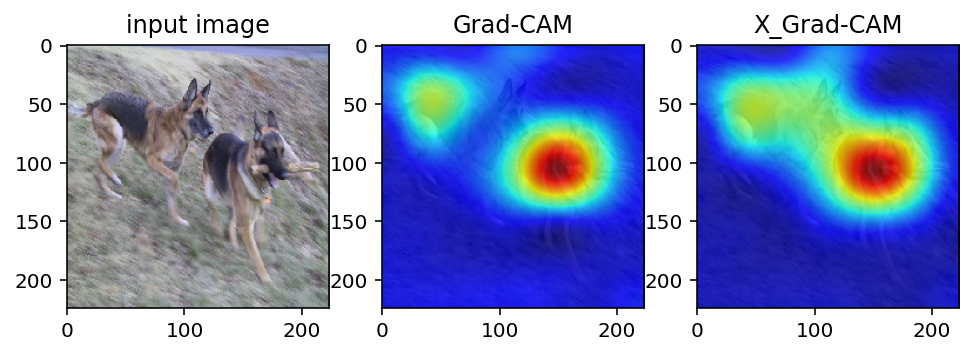

In [20]:
input_model=model
image=img


layer_name='block5_conv3' #block5_pool 
layer_name='block5_pool'

g_cam=gradcam(input_model,layer_name,image)
xg_cam=X_gradcam(input_model,layer_name,image)


 

 
 
 
    
fig, ax = plt.subplots(nrows=1,ncols=3)
plt.subplot(131)
plt.imshow(orig_img)
plt.title("input image")
plt.subplot(132)
plt.imshow(orig_img)
plt.imshow(g_cam,alpha=0.8,cmap="jet")
plt.title("Grad-CAM")
plt.subplot(133)
plt.imshow(orig_img)
plt.imshow(xg_cam,alpha=0.8,cmap="jet")
plt.title("X_Grad-CAM")